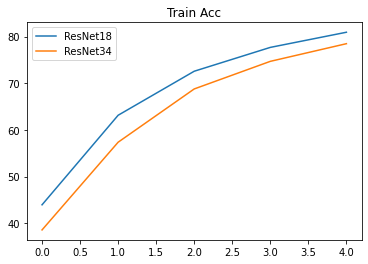

ResNet18 : [43.936 63.136 72.576 77.686 80.934] 
 [43.936 63.136 72.576 77.686 80.934] 

ResNet34 : [38.552 57.356 68.778 74.694 78.48 ] 
 [38.552 57.356 68.778 74.694 78.48 ] 



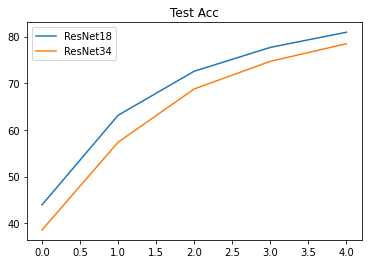

In [27]:
import numpy as np
import os
import pickle
import matplotlib.pylab as plt

save_dir = '/home/lagoon/Project/ml_albert_no/Result/multiStep/'
dir_list = os.listdir(save_dir)
for dir_name in dir_list:
    l_load_dir = os.listdir( save_dir + dir_name)
    load_dir = save_dir + dir_name + '/'  + l_load_dir[0] 
    train_acc = np.load(load_dir + '/np_train_acc_list.npy', allow_pickle=True)
    test_acc = np.load(load_dir + '/np_test_acc_list.npy', allow_pickle=True)
    train_loss = np.load(load_dir + '/np_train_loss_list.npy', allow_pickle=True)
    test_loss = np.load(load_dir + '/np_test_loss_list.npy', allow_pickle=True)

    with open( load_dir + '/hyper.pickle', 'rb') as fr:
        hyper_param_load = pickle.load(fr)
    hyper_param_dict = hyper_param_load

    # plt.plot(np.arange(0, train_acc.shape[0]), train_acc, label=  'lr = ' + str(hyper_param_load['lr']))
    plt.plot(np.arange(0, train_acc.shape[0]), train_acc, label= dir_name)
plt.legend()
plt.title('Train Acc')
plt.show()




for dir_name in dir_list:
    l_load_dir = os.listdir( save_dir + dir_name)
    load_dir = save_dir + dir_name + '/'  + l_load_dir[0] 
    train_acc = np.load(load_dir + '/np_train_acc_list.npy', allow_pickle=True)
    test_acc = np.load(load_dir + '/np_test_acc_list.npy', allow_pickle=True)
    train_loss = np.load(load_dir + '/np_train_loss_list.npy', allow_pickle=True)
    test_loss = np.load(load_dir + '/np_test_loss_list.npy', allow_pickle=True)

    with open( load_dir + '/hyper.pickle', 'rb') as fr:
        hyper_param_load = pickle.load(fr)
    hyper_param_dict = hyper_param_load

    # plt.plot(np.arange(0, train_acc.shape[0]), train_acc, label=  'lr = ' + str(hyper_param_load['lr']))
    plt.plot(np.arange(0, test_acc.shape[0]), test_acc, label= dir_name)
    print(dir_name, ':', train_acc, '\n', test_acc, '\n')
    
plt.legend()
plt.title('Test Acc')
plt.show()